### import libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### import data

In [35]:
df=pd.read_csv(r"D:\DATA SCIENCE\PROJECT\Cancer_Data.csv")
print(df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  sym

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

#### Data cleaning

#### check duplicates

In [37]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool


In [38]:
df.dropna(inplace=True)

#### Remove outliers

#### Boxplot

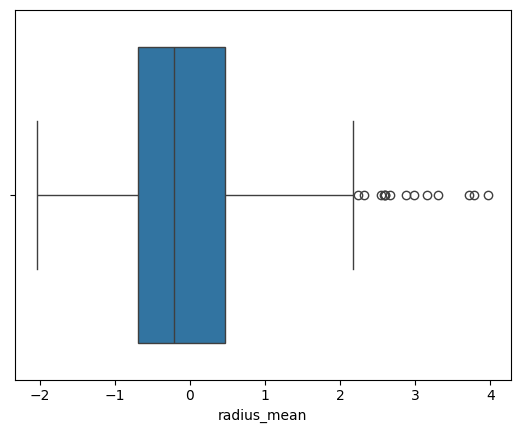

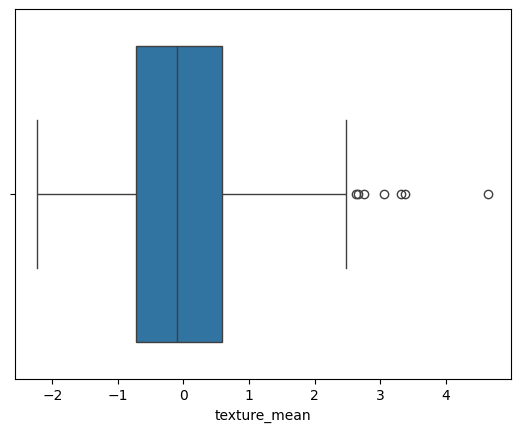

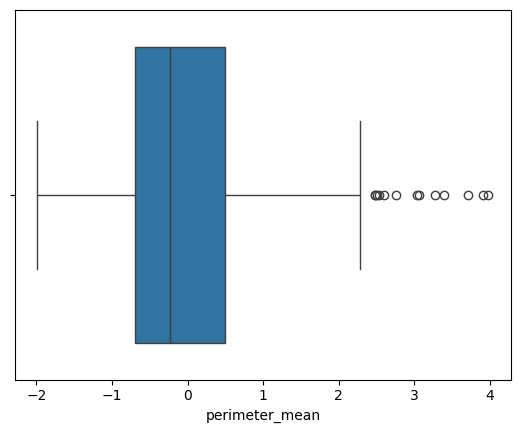

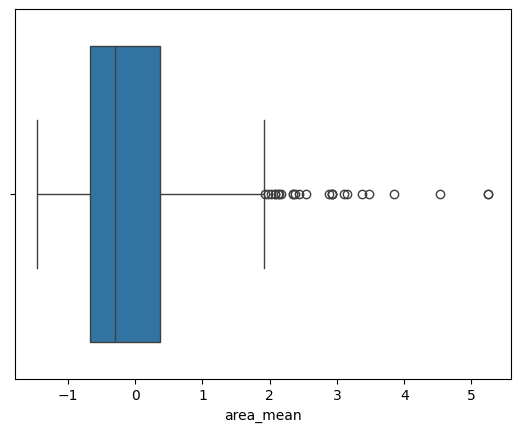

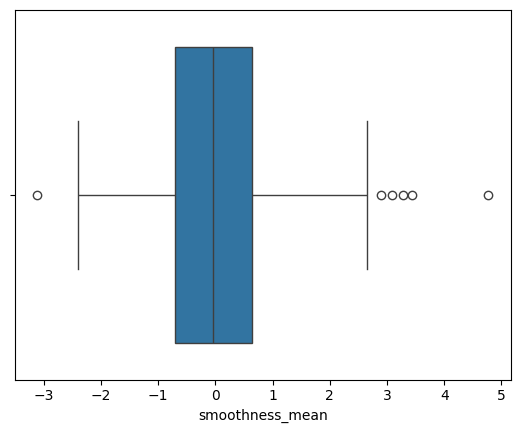

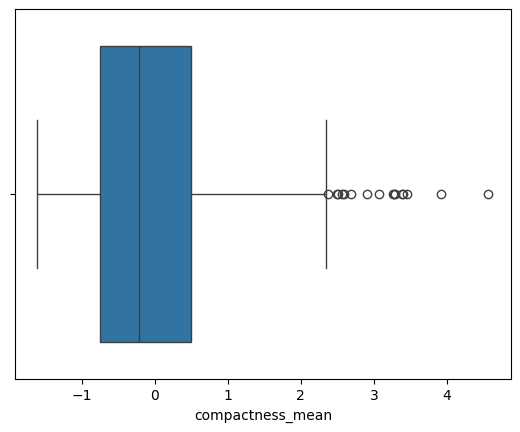

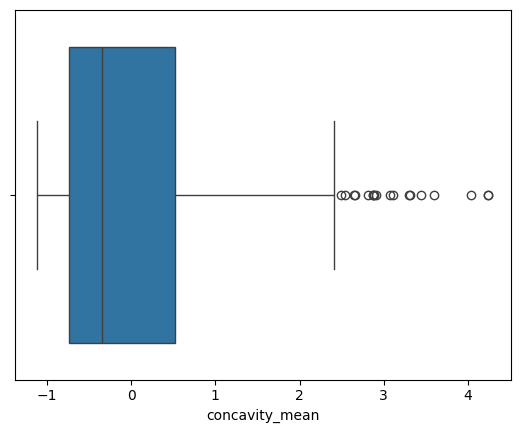

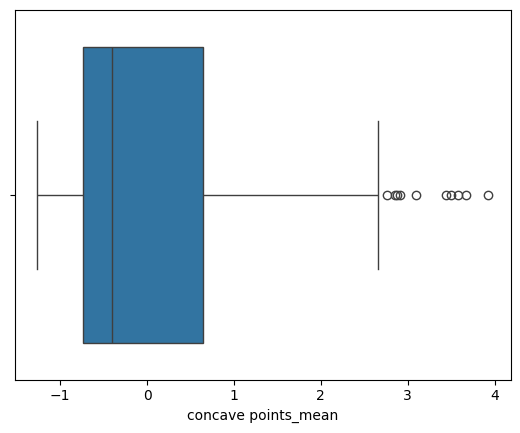

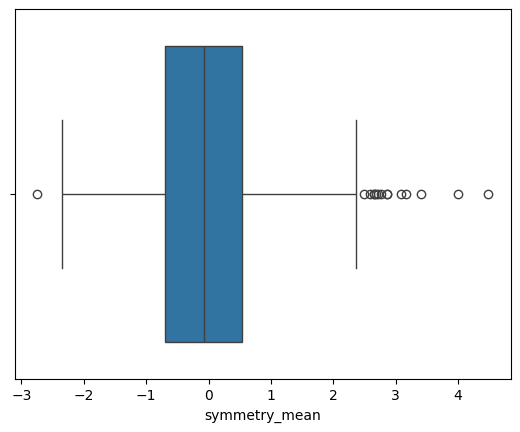

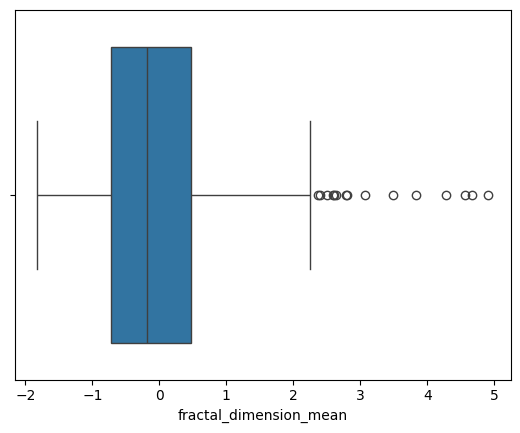

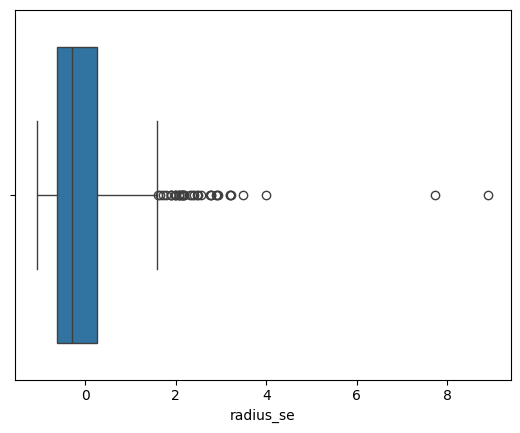

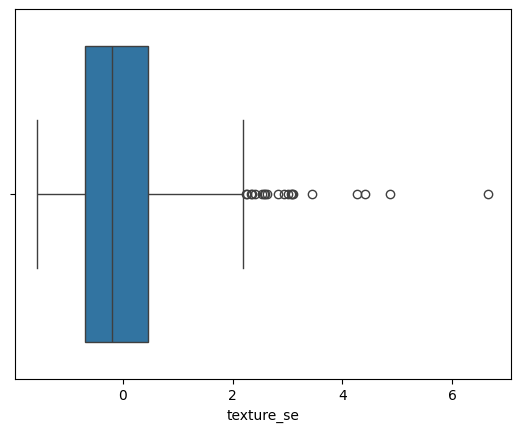

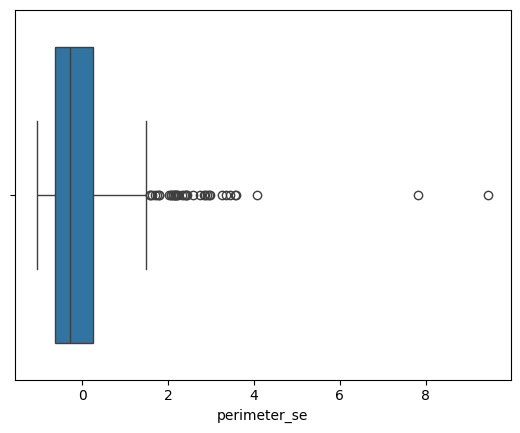

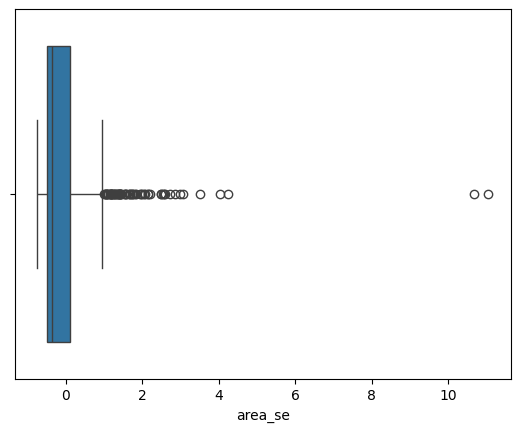

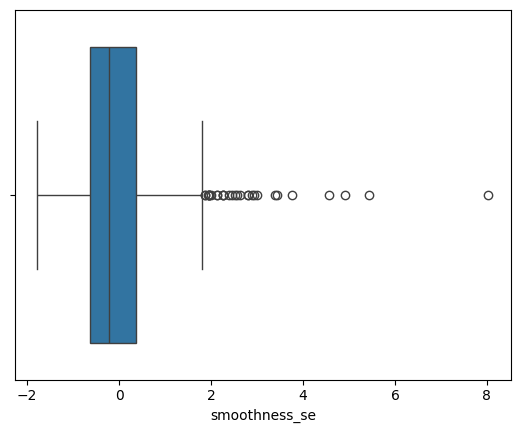

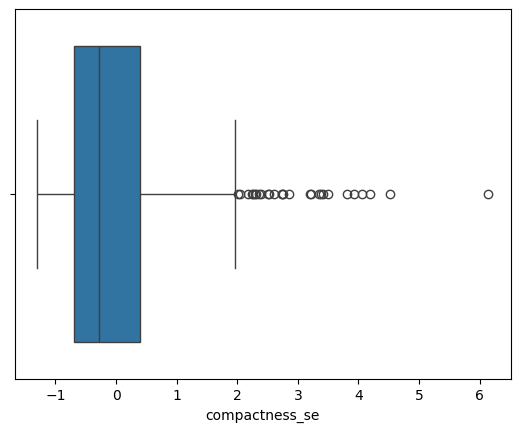

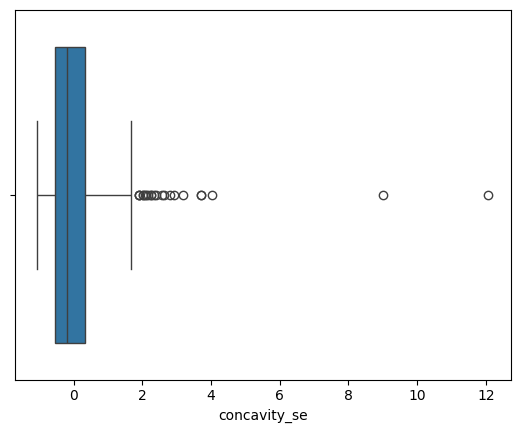

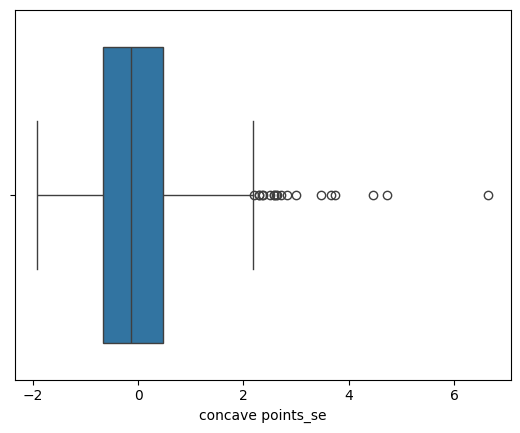

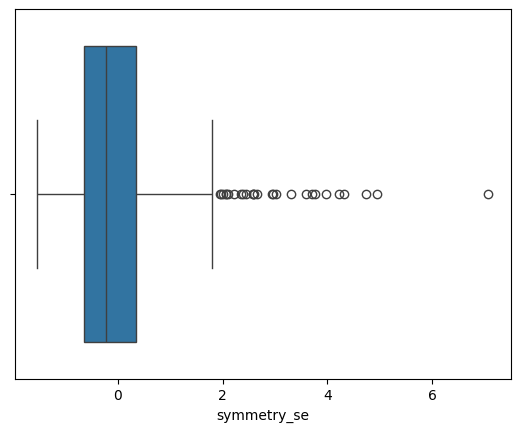

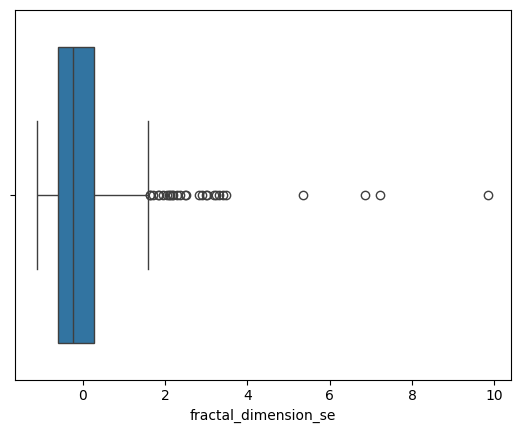

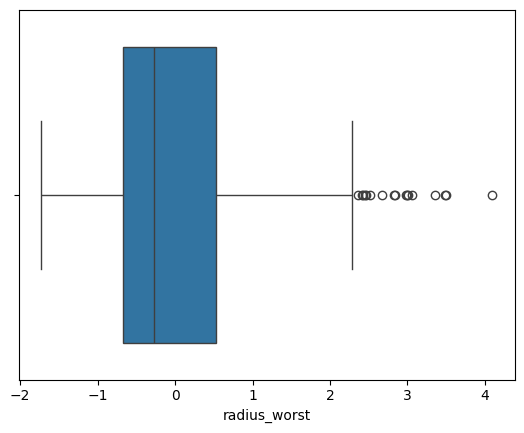

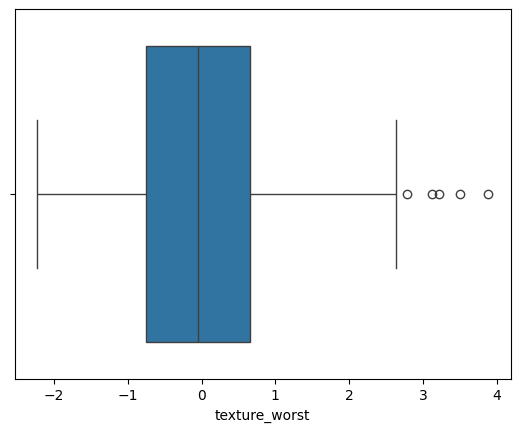

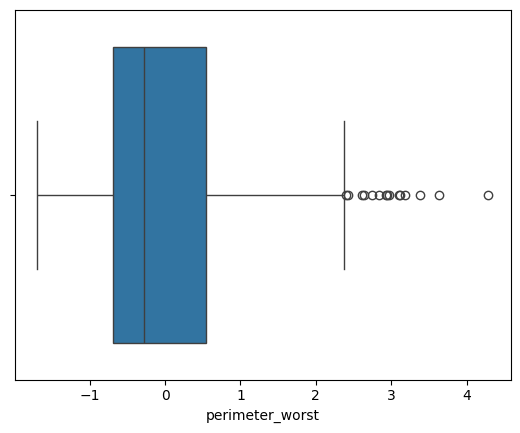

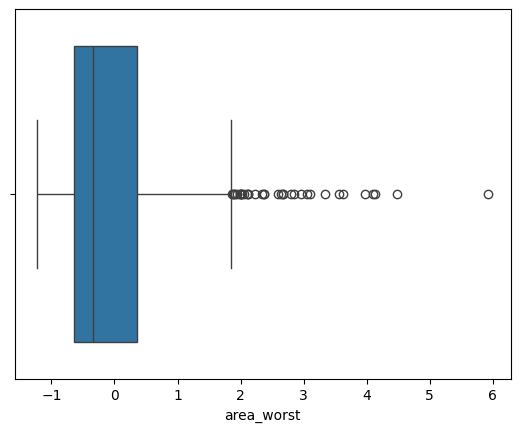

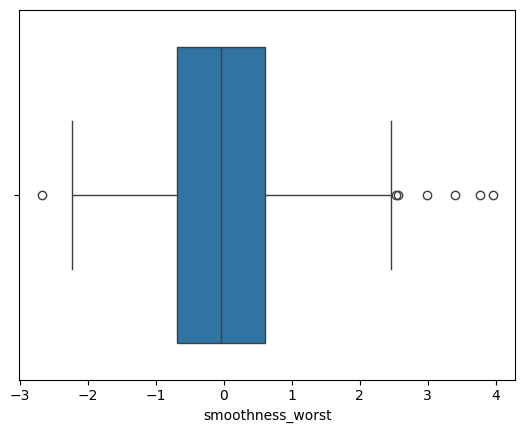

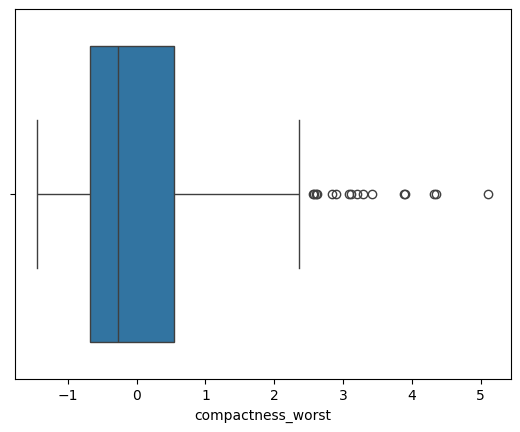

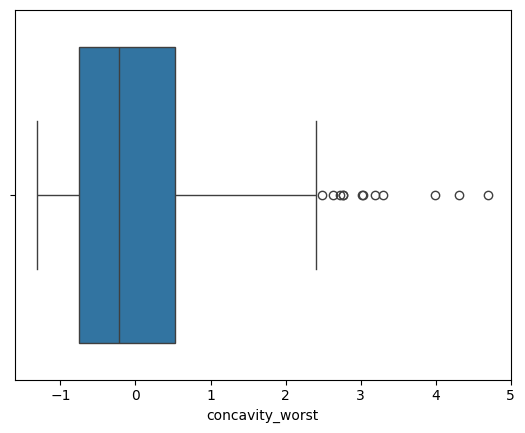

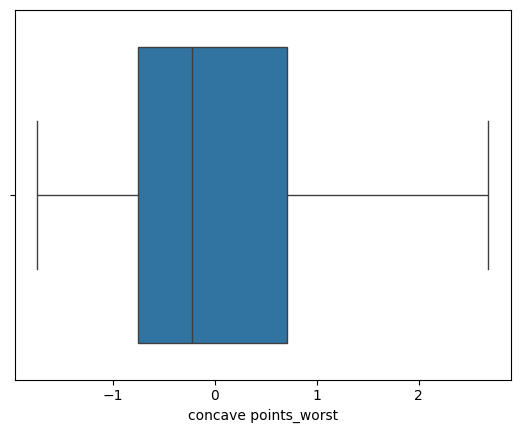

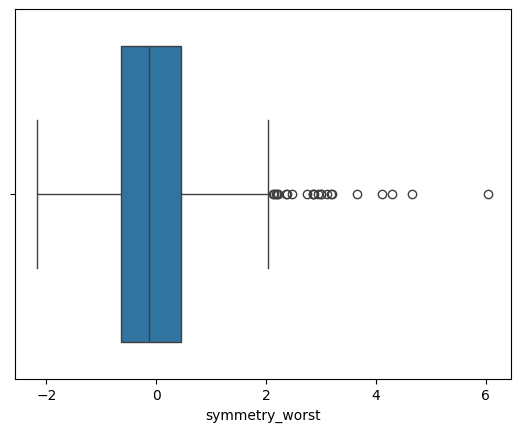

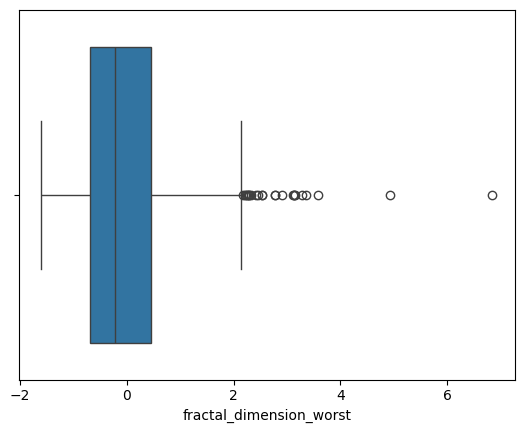

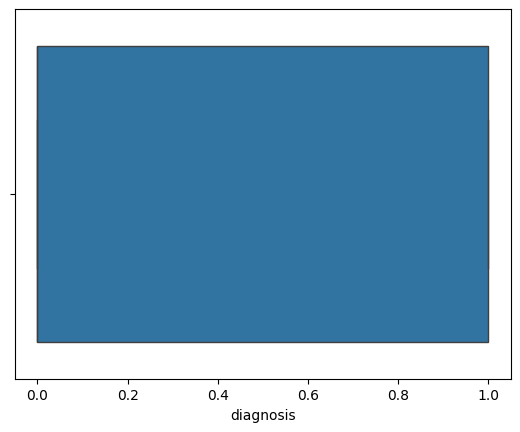

In [39]:
import seaborn as sns
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [40]:
x=df.iloc[:,  4:33].values #indep
y=df['diagnosis'] #dep

#### scatterplot

<Axes: xlabel='radius_mean', ylabel='diagnosis'>

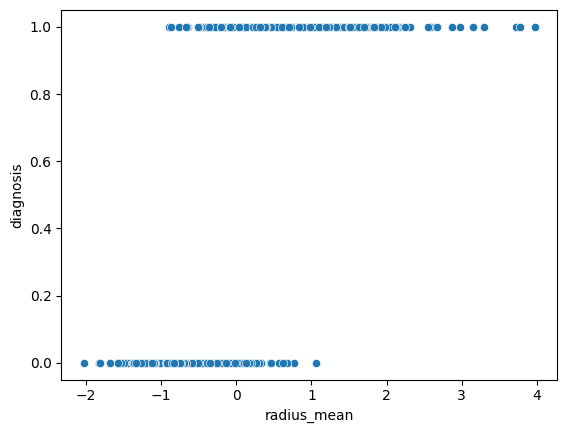

In [41]:
sns.scatterplot(x="radius_mean",y="diagnosis",data=df)

#### encodeing

In [42]:
# categ_col = df.select_dtypes(include=['object']).columns

# # Initialize encoders
# label_encoder = LabelEncoder()

# # Encode each categorical column using Label Encoding for simplicity
# encoded_data = df.copy()
# for i in categ_col:
#     encoded_data[i] = label_encoder.fit_transform(df[i])

# # Display the first 5 rows of the encoded dataset
# print(encoded_data)

#### Extract dependent and independent variable

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

<Axes: >

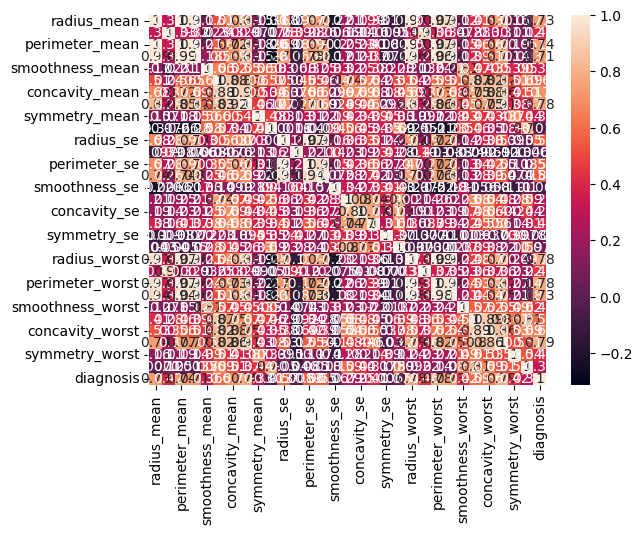

In [43]:
corre=df.corr(numeric_only=True)
print(corre)
sns.heatmap(corre,annot=True)

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = "D:\DATA SCIENCE\PROJECT\Cancer_Data.csv"
data = pd.read_csv(file_path)



# Encode the target column
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])  # Malignant (M) -> 1, Benign (B) -> 0

# Normalize the numerical features
scaler = StandardScaler()
features = data.drop('diagnosis', axis=1)
features_scaled = scaler.fit_transform(features)

# Combine the scaled features with the target column
processed_data = pd.DataFrame(features_scaled, columns=features.columns)
processed_data['diagnosis'] = data['diagnosis']

# Save the processed dataset to a new CSV file
processed_data.to_csv('D:\DATA SCIENCE\PROJECT\Cancer_Data.csv', index=False)

print("Data encoding and scaling complete. Processed data saved to 'Processed_Cancer_Data.csv'.")


Data encoding and scaling complete. Processed data saved to 'Processed_Cancer_Data.csv'.


#### Split Train and Test Data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Build model

In [46]:
# Fitting the MLR model to the training set
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the test set result
y_pred = model.predict(x_test)

# To compare the actual output values for X_test with the predicted value
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

     Actual     Predicted
204       0 -3.346140e-16
70        1  1.000000e+00
131       1  1.000000e+00
431       0 -5.661723e-17
540       0  1.319522e-16
..      ...           ...
486       0 -1.436568e-16
75        1  1.000000e+00
249       0  3.302631e-16
238       0 -3.427040e-16
265       1  1.000000e+00

[114 rows x 2 columns]


In [47]:
accuracy=r2_score(y_test,y_pred)*100
print(accuracy)

100.0
